# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv

from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin AND bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Print total articles for BTC
print(f"Total articles available for Bitcoin(BTC): {btc_headlines['totalResults']}")

Total articles available for Bitcoin(BTC): 3940


In [6]:
# Show sample article for BTC
#btc_headlines["articles"][0]

In [7]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [8]:
# Print total articles for ETH
print(f"Total articles available for Ethereum(ETH): {eth_headlines['totalResults']}")

Total articles available for Ethereum(ETH): 1151


In [9]:
# Show sample article for BTC
eth_headlines["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
 'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
 'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
 'publishedAt': '2020-10-21T13:28:15Z',
 'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'}

In [10]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reordering DataFrame
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.tail()

,date,text,compound,positive,negative,neutral
92,2020-11-06,"Bitcoin (BTC) has just passed the $15,500 USD ...",0.4215,0.072,0.000,0.928
93,2020-10-26,The confidential treatment records of tens of ...,-0.7717,0.000,0.210,0.790
94,2020-10-21,The signs held up by protesters have been clea...,0.2732,0.117,0.093,0.790
95,2020-11-05,Square Inc. shares gained in after-hours tradi...,0.5859,0.142,0.000,0.858
96,2020-11-05,"In 1987, Valerio Viccei stole an estimated $97...",-0.0258,0.136,0.138,0.726


In [12]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reordering DataFrame
#cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.tail()

,date,text,compound,positive,negative,neutral
88,2020-10-24,Ethereum\r\nEthereum fell by 1.23% on Friday. ...,0.0000,0.000,0.00,1.000
89,2020-11-03,"November\r\n3, 2020\r\n9 min read\r\nOpinions ...",0.9442,0.374,0.00,0.626
90,2020-11-10,Hybrid blockchain platform Kadena is teaming u...,0.0000,0.000,0.00,1.000
91,2020-11-07,Ethereum\r\nEthereum surged by 9.43% on Friday...,0.0000,0.000,0.00,1.000
92,2020-10-21,A solution being implemented to safeguard agai...,-0.0093,0.130,0.13,0.740


In [13]:
# Create the Bitcoin and Etherum article lists
#btc_headlines_ = [article['title'] for article in btc_headlines['articles']]
#eth_headlines_ = [article['title'] for article in eth_headlines['articles']]

In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.098496,0.065753,0.044722,0.889526
std,0.472158,0.071688,0.071441,0.084262
min,-0.875000,0.000000,0.000000,0.703000
25%,-0.102700,0.000000,0.000000,0.831000
50%,0.000000,0.060000,0.000000,0.890000
75%,0.510600,0.122000,0.077000,0.955000
max,0.946800,0.297000,0.263000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,93.000000,93.000000,93.000000,93.000000
mean,0.238940,0.073946,0.016011,0.910065
std,0.350894,0.079762,0.035616,0.084682
min,-0.493900,0.000000,0.000000,0.626000
25%,0.000000,0.000000,0.000000,0.859000
50%,0.202300,0.065000,0.000000,0.922000
75%,0.458800,0.107000,0.000000,1.000000
max,0.946800,0.374000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum at 0.074

Q: Which coin had the highest compound score?

A: Bitcoin at 0.098

Q. Which coin had the highest positive score?

A: Ethereum at 0.074

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erenturkmenoglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/erenturkmenoglu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Create a list of cryptos
crypto_dfs = [btc_df, eth_df]

# Set the default stopwords in english
stop_words = stopwords.words('english')

In [19]:
def tokenizer(series):
    """Tokenizes text."""
    
    # Create a list of the words, that are in lowercase, without numbers or punctuation
    series = series.apply(lambda text: re.sub(r'[^a-zA-Z]+', ' ', text.lower()).split())
    
    # Remove the stop words
    series = series.apply(lambda text: [word for word in text if word not in stop_words])
    
    # Remove the stop words
    lemmitizer = WordNetLemmatizer()
    series = series.apply(lambda text: [lemmitizer.lemmatize(word) for word in text])

    return series

In [20]:
# Create the new columns for tokens
for crypto_df in crypto_dfs:
    crypto_df['Tokens'] = tokenizer(crypto_df['text'])

In [21]:
# Preview the bitcoin tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-10-21,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,0.000,1.000,"[paypal, partnered, cryptocurrency, company, p..."
1,2020-11-05,"Two days ago, about $1 billion worth of bitcoi...",0.2263,0.049,0.000,0.951,"[two, day, ago, billion, worth, bitcoin, sat, ..."
2,2020-10-21,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.000,0.838,"[paypal, rolling, cryptocurrency, support, lat..."
3,2020-10-20,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.154,0.846,"[financial, crime, enforcement, network, fince..."
4,2020-11-06,"2018’s jokes are 2020’s reality. I’m speaking,...",0.2500,0.059,0.000,0.941,"[joke, reality, speaking, course, tesla, tequi..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [24]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = Counter([ngram for text in btc_df['Tokens'] for ngram in tuple(ngrams(text, 2))])

In [25]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams = Counter([ngram for text in eth_df['Tokens'] for ngram in tuple(ngrams(text, 2))]) 

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    tokens = [word for row in tokens for word in row]
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin (Unigram)
bitcoin_top10words = token_count(btc_df['Tokens'])
print(bitcoin_top10words)

[('char', 97), ('reuters', 57), ('bitcoin', 49), ('cryptocurrency', 27), ('new', 20), ('paypal', 18), ('u', 17), ('london', 15), ('year', 14), ('york', 14)]


In [28]:
# Get the top 10 words for Ethereum (Unigram)
ethereum_top10words = token_count(eth_df['Tokens'])
print(ethereum_top10words)

[('char', 93), ('ethereum', 61), ('bitcoin', 32), ('cryptocurrency', 23), ('defi', 17), ('paypal', 15), ('day', 14), ('digital', 13), ('contract', 13), ('u', 12)]


In [29]:
# Get the top 10 words for Bitcoin (Bigram N=1)
print(bitcoin_ngrams.most_common(10))

[(('new', 'york'), 14), (('london', 'reuters'), 13), (('reuters', 'staff'), 12), (('file', 'photo'), 11), (('york', 'reuters'), 9), (('reuters', 'paypal'), 8), (('paypal', 'holding'), 8), (('holding', 'inc'), 8), (('bitcoin', 'btc'), 7), (('virtual', 'currency'), 6)]


In [30]:
# Get the top 10 words for Ethereum (Bigram N=2)
print(ethereum_ngrams.most_common(10))

[(('ul', 'li'), 9), (('decentralized', 'finance'), 8), (('deposit', 'contract'), 7), (('finance', 'defi'), 7), (('min', 'read'), 6), (('customer', 'buy'), 6), (('digital', 'payment'), 6), (('bitcoin', 'btc'), 6), (('digital', 'currency'), 5), (('read', 'opinion'), 5)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

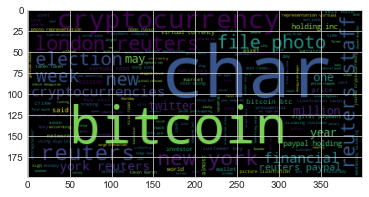

In [32]:
# Generate the Bitcoin word cloud
bitcoin_words = [word for row in btc_df['Tokens'] for word in row]
wc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(wc)

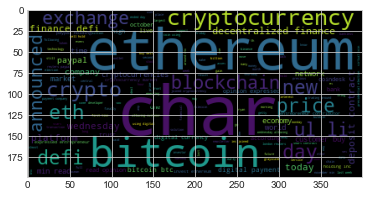

In [33]:
# Generate the Ethereum word cloud
bitcoin_words = [word for row in eth_df['Tokens'] for word in row]
wc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy
import en_core_web_sm

In [35]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en')

In [37]:
btc_headlines

{'status': 'ok',
 'totalResults': 3940,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

## Bitcoin NER

In [38]:
# Concatenate all of the bitcoin text together
bitcoin_content = [btc_headlines['articles'][i]['content'] for i in range(0, len(btc_headlines['articles'])) 
                     if btc_headlines['articles'][i]['content'] is not None]

In [40]:
# Run the NER processor on all of the text
doc = nlp(str(bitcoin_content))

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER" 

In [41]:
# Render the visualization
displacy.render(doc, style='ent') 

In [42]:
# List all Entities
bitcoin_ents = [str(ent) for ent in doc.ents]
bitcoin_ents

['PayPal',
 'Paxos',
 'PayPal',
 'U.S.',
 'Two days ago',
 'about $1 billion',
 'bitcoin',
 'the Silk Road',
 '2013',
 'one',
 'PayPal',
 'later this',
 'Alex Castro',
 'Wednesday',
 'first',
 "'The Financial Crimes Enforcement Network",
 '$60 million',
 'Larry Dean Harmon',
 'Helix',
 'Coin Ninja',
 'first',
 "'2018",
 '2020',
 'Tesla Tequila',
 'April',
 'Elon Musk',
 'Teslaquila',
 'U.S.',
 'Individual X',
 "'4",
 'participating\\r\\nThe',
 'one',
 'above $14,000',
 'Saturday',
 'morning',
 'first',
 'January 2018',
 'Reuters',
 'Beanie Babies',
 '$1 billion',
 'Silk Road',
 'Ross Ulbricht',
 'this week',
 '1',
 '1',
 'Microsoft',
 'Ukraine',
 'nine years',
 'more than $10 million',
 'Microsoft',
 'Reuters',
 'Ozioma Egemasi',
 'Nigerian',
 'Markets\\r\\nAlexis',
 'Reuters',
 'Ozioma Egemasi',
 'Nigerian',
 'today',
 '12th',
 'Bitcoin',
 'Iran',
 'Bitcoin',
 'Central Bank to Fund Imports\\r\\nIran',
 'PayPal',
 '305 million',
 'Lang/CNET\\r\\nPayPal',
 'Bitcoin',
 'March 13, 2020',


---

## Ethereum NER

In [43]:
# Concatenate all of the bitcoin text together
ethereum_content = [eth_headlines['articles'][i]['content'] for i in range(0, len(eth_headlines['articles'])) 
                     if eth_headlines['articles'][i]['content'] is not None]

In [44]:
# Run the NER processor on all of the text
doc = nlp(str(ethereum_content))

# Add a title to the document
doc.user_data["title"] = "Ethereum NER" 

In [45]:
# Render the visualization
displacy.render(doc, style='ent') 

In [46]:
# List all Entities
ethereum_ents = [str(ent) for ent in doc.ents]
ethereum_ents

['PayPal',
 'Paxos',
 'PayPal',
 'U.S.',
 'Arianee',
 'PayPal',
 'later this',
 'Alex Castro',
 'Wednesday',
 'first',
 '2020',
 'the chaos.\\r\\nGrayscale Investments',
 'the Reserve Bank of Australia',
 'Sydney',
 'Australia',
 'March 7, 2017',
 'REUTERS/',
 '2020',
 'U.S.',
 'Wednesday',
 'morning',
 'Elon Musk',
 'Quibi',
 'PayPal',
 'Netflix',
 'Daily Crunch',
 'October 21',
 '2020.\\r\\nThe',
 '2020\\r\\n5',
 'ICO',
 'Bitcoin',
 'Amazon',
 'Prime Day',
 'One',
 'the Ledger Nano S',
 '39.99',
 'LONDON',
 'Reuters',
 'PayPal Holdings Inc',
 'Wednesday',
 'U.S.',
 'LONDON',
 'Reuters',
 'PayPal Holdings Inc',
 'Wednesday',
 'U.S.',
 'LONDON',
 'Reuters',
 'PayPal Holdings Inc',
 'Wednesday',
 'U.S.',
 'LONDON',
 'Reuters',
 'PayPal Holdings Inc',
 'Wednesday',
 'U.S.',
 'Bitcoin',
 'Wednesday',
 'PayPal',
 'Bitcoin',
 'Ethereum',
 'Bitcoin Cash',
 'Litecoin',
 'system.\\r',
 '2020\\r\\n4 min',
 'Spanish',
 'AI',
 'this process.\\r\\n<ul><li',
 'November 9',
 "'Not a CWT",
 'CWT',
 '